In [1]:
!pip install 'aif360'

     |████████████████████████████████| 175 kB 8.5 MB/s 
     |████████████████████████████████| 564 kB 40.6 MB/s 
  Created wheel for memory-profiler: filename=memory_profiler-0.60.0-py3-none-any.whl size=31284 sha256=0eaee7fd99ccbeb59680c69b3dcf9b5dcb883b391f4c24e3b2f570543c89c32f
  Stored in directory: /root/.cache/pip/wheels/67/2b/fb/326e30d638c538e69a5eb0aa47f4223d979f502bbdb403950f
Successfully built memory-profiler


In [2]:
cd /usr/local/lib/python3.7/dist-packages/aif360/data/raw/adult

/usr/local/lib/python3.7/dist-packages/aif360/data/raw/adult


In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test

--2022-05-11 10:48:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data’

adult.data          100%[===================>]   3.79M  16.2MB/s    in 0.2s    

2022-05-11 10:48:14 (16.2 MB/s) - ‘adult.data’ saved [3974305/3974305]

--2022-05-11 10:48:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5229 (5.1K) [application/x-httpd-php]
Saving to: ‘adult.names’

adult.names         100%[===================>]   5.11K  --.-KB/s    in 0s      

2022-

In [4]:
pip install fairlearn

     |████████████████████████████████| 177 kB 7.0 MB/s 


In [5]:
from aif360.datasets import AdultDataset
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_adult
import numpy as np
from sklearn.preprocessing import StandardScaler
from aif360.metrics import ClassificationMetric
from sklearn.model_selection import StratifiedKFold

np.random.seed(4) #set random seed

In [6]:
OG_dataset = load_preproc_data_adult(['sex']) #setting the protected attribute to sex 

OG_dataset_train, OG_dataset_test = OG_dataset.split([0.7], shuffle=True) 

privileged_groups = [{'sex': 1}] #Male
unprivileged_groups = [{'sex': 0}] #Female

#Normalise all the data (as per the lab class)
scale = StandardScaler()
X_train = scale.fit_transform(OG_dataset_train.features) #scales each feature/variable to unit variance
y_train = OG_dataset_train.labels.ravel() #Flattens array

X_test = scale.transform(OG_dataset_test.features) 
y_test = OG_dataset_test.labels.ravel() 

In [7]:
print(OG_dataset) #find where the protected attribute sex is

               instance weights features                                      \
                                         protected attribute                   
                                    race                 sex Age (decade)=10   
instance names                                                                 
0                           1.0      0.0                 1.0             0.0   
1                           1.0      1.0                 1.0             0.0   
2                           1.0      1.0                 1.0             0.0   
3                           1.0      0.0                 1.0             0.0   
4                           1.0      1.0                 0.0             1.0   
...                         ...      ...                 ...             ...   
48837                       1.0      1.0                 0.0             0.0   
48838                       1.0      1.0                 1.0             0.0   
48839                       1.0      1.0

In [8]:
print(X_train)

[[ 0.41135685  0.70369693 -0.23177581 ... -0.18309776 -0.23219587
  -0.57477217]
 [ 0.41135685 -1.42106632 -0.23177581 ... -0.18309776 -0.23219587
  -0.57477217]
 [ 0.41135685 -1.42106632 -0.23177581 ... -0.18309776 -0.23219587
  -0.57477217]
 ...
 [ 0.41135685 -1.42106632 -0.23177581 ... -0.18309776 -0.23219587
  -0.57477217]
 [ 0.41135685  0.70369693 -0.23177581 ... -0.18309776 -0.23219587
  -0.57477217]
 [ 0.41135685  0.70369693 -0.23177581 ... -0.18309776 -0.23219587
  -0.57477217]]


In [9]:
print(X_train.shape)

(34189, 18)


In [10]:
X_train = np.delete(X_train, (1,1), 1) #should delete the sex attribute 

In [11]:
print(X_train) #checking i've deleted what i intended to 

[[ 0.41135685 -0.23177581 -0.5748172  ... -0.18309776 -0.23219587
  -0.57477217]
 [ 0.41135685 -0.23177581 -0.5748172  ... -0.18309776 -0.23219587
  -0.57477217]
 [ 0.41135685 -0.23177581 -0.5748172  ... -0.18309776 -0.23219587
  -0.57477217]
 ...
 [ 0.41135685 -0.23177581  1.73968349 ... -0.18309776 -0.23219587
  -0.57477217]
 [ 0.41135685 -0.23177581 -0.5748172  ... -0.18309776 -0.23219587
  -0.57477217]
 [ 0.41135685 -0.23177581 -0.5748172  ... -0.18309776 -0.23219587
  -0.57477217]]


In [12]:
print(X_train.shape)

(34189, 17)


In [13]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression

np.random.seed(4)

In [14]:
#same process as before 

Cross_Validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
Model = LogisticRegression(solver='liblinear', random_state=1)

Scores = cross_val_score(Model, X_train, y_train, scoring='accuracy', cv=Cross_Validation)

print('Accuracy: %.3f  Standard deviation: %.3f' % (mean(Scores), std(Scores)))

Accuracy: 0.789  Standard deviation: 0.004


In [15]:
C_Values=[100000, 1000, 10, 1.0, 0.01, 0.0001, 0.000001, 0.00000001]

my_dict = {}
accuracy = []

for i in C_Values:
  Model = LogisticRegression(C=i, solver='liblinear')
  Scores = cross_val_score(Model, X_train, y_train, scoring='accuracy', cv=Cross_Validation)
  print("C value = " +  str(i) + '  Accuracy: %.3f' % (mean(Scores)))
  accuracy.append(mean(Scores))

for i in range(len(C_Values)):
    my_dict[C_Values[i]] = accuracy[i]

find_best_accuracy = max(my_dict, key=my_dict.get)

print( "The model with the highest accuracy has a C value of: ", find_best_accuracy)

C value = 100000  Accuracy: 0.789
C value = 1000  Accuracy: 0.789
C value = 10  Accuracy: 0.789
C value = 1.0  Accuracy: 0.789
C value = 0.01  Accuracy: 0.789
C value = 0.0001  Accuracy: 0.789
C value = 1e-06  Accuracy: 0.788
C value = 1e-08  Accuracy: 0.788
The model with the highest accuracy has a C value of:  0.0001


In [17]:
C_Values=[100000, 1000, 10, 1.0, 0.01, 0.0001, 0.000001, 0.00000001]

my_dict = {}
fairness = []
value=0

for i in C_Values:
  Model = LogisticRegression(C=i, solver='liblinear')
  Scores = cross_val_score(Model, X_train, y_train, scoring='accuracy', cv=Cross_Validation)

  predictions = cross_val_predict(Model, X_train, y_train, cv=Cross_Validation)

  train_predictions = OG_dataset_train.copy()
  train_predictions.labels = predictions

  Metric = ClassificationMetric(OG_dataset_train, train_predictions , unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
  Equal_of_Opp = Metric.equal_opportunity_difference()
  print("C value = " +  str(i) + '  Equality_of_Opportunity score: %.3f' % Equal_of_Opp)
  fairness.append(Equal_of_Opp)

for i in range(len(C_Values)):
    my_dict[C_Values[i]] = fairness[i]

fair_key, fair_val = min(my_dict.items(), key=lambda x: abs(value - x[1]))

print( "The model with the highest fairness has a C value of: ", fair_key)

C value = 100000  Equality_of_Opportunity score: -0.015
C value = 1000  Equality_of_Opportunity score: -0.015
C value = 10  Equality_of_Opportunity score: -0.015
C value = 1.0  Equality_of_Opportunity score: -0.015
C value = 0.01  Equality_of_Opportunity score: -0.015
C value = 0.0001  Equality_of_Opportunity score: 0.005
C value = 1e-06  Equality_of_Opportunity score: 0.003
C value = 1e-08  Equality_of_Opportunity score: 0.003
The model with the highest fairness has a C value of:  1e-06


In [18]:
X_test = np.delete(X_test, (1,1), 1)

In [19]:
Accurate_model = find_best_accuracy
Fair_model = fair_key

In [20]:
print("C value = ", Accurate_model)
Model = LogisticRegression(C=Accurate_model, solver='liblinear')
Model.fit(X_train, y_train)
predictions = Model.predict(X_test)

test_predictions = OG_dataset_test.copy()
test_predictions.labels = predictions
print("Accuracy", sum(predictions==y_test)/len(y_test))

Metric = ClassificationMetric(OG_dataset_test, test_predictions , unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
Equal_of_Opp = Metric.equal_opportunity_difference()
print('Equality_of_Opportunity score: %.3f' % Equal_of_Opp)

C value =  0.0001
Accuracy 0.7911007984713028
Equality_of_Opportunity score: -0.003


In [21]:
print("C value = ", Fair_model)
Model = LogisticRegression(C=Fair_model, solver='liblinear')
Model.fit(X_train, y_train)
predictions = Model.predict(X_test)

test_predictions = OG_dataset_test.copy()
test_predictions.labels = predictions
print("Accuracy", sum(predictions==y_test)/len(y_test))

Metric = ClassificationMetric(OG_dataset_test, test_predictions , unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
Equal_of_Opp = Metric.equal_opportunity_difference()
print('Equality_of_Opportunity score: %.3f' % Equal_of_Opp)

C value =  1e-06
Accuracy 0.7906230805978298
Equality_of_Opportunity score: -0.003


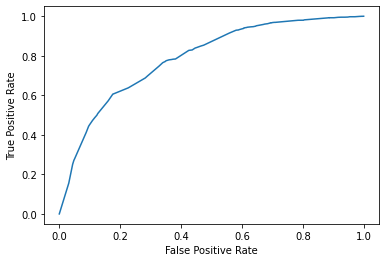

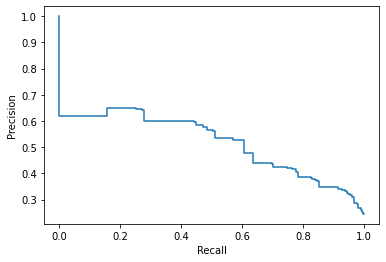

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

y_score = Model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=Model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=Model.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

In [23]:
cd /usr/local/lib/python3.7/dist-packages/aif360/data/raw/german

/usr/local/lib/python3.7/dist-packages/aif360/data/raw/german


In [24]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data

--2022-05-11 10:48:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79793 (78K) [application/x-httpd-php]
Saving to: ‘german.data’

german.data         100%[===================>]  77.92K  --.-KB/s    in 0.05s   

2022-05-11 10:48:59 (1.40 MB/s) - ‘german.data’ saved [79793/79793]



In [25]:
from aif360.datasets import GermanDataset
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_german

np.random.seed(4)

In [26]:
OG_dataset = load_preproc_data_german(['age']) #setting the protected attribute to age

OG_dataset_train, OG_dataset_test = OG_dataset.split([0.7], shuffle=True) 

privileged_groups2 = [{'age': 1}] #Over 25
unprivileged_groups2 = [{'age': 0}] #Under 25

#Normalise all the data (as per the lab class)
scale = StandardScaler()
X_train = scale.fit_transform(OG_dataset_train.features) #scales each feature/variable to unit variance
y_train = OG_dataset_train.labels.ravel() #Flattens array

X_test = scale.transform(OG_dataset_test.features) 
y_test = OG_dataset_test.labels.ravel()

In [27]:
print(OG_dataset) #checking where the age attribute is

               instance weights            features                            \
                                protected attribute                             
                                                age  sex credit_history=Delay   
instance names                                                                  
0                           1.0                 1.0  1.0                  0.0   
1                           1.0                 0.0  0.0                  0.0   
2                           1.0                 1.0  1.0                  0.0   
3                           1.0                 1.0  1.0                  0.0   
4                           1.0                 1.0  1.0                  1.0   
...                         ...                 ...  ...                  ...   
995                         1.0                 1.0  0.0                  0.0   
996                         1.0                 1.0  1.0                  0.0   
997                         

In [28]:
print(X_train)

[[-2.04577252  0.6882472  -0.31173496 ...  0.99430195 -0.87617165
  -0.25898489]
 [ 0.4888129  -1.45296631 -0.31173496 ...  0.99430195 -0.87617165
  -0.25898489]
 [ 0.4888129   0.6882472  -0.31173496 ... -1.00573071  1.14132887
  -0.25898489]
 ...
 [ 0.4888129   0.6882472  -0.31173496 ... -1.00573071  1.14132887
  -0.25898489]
 [ 0.4888129   0.6882472  -0.31173496 ... -1.00573071  1.14132887
  -0.25898489]
 [ 0.4888129   0.6882472  -0.31173496 ... -1.00573071  1.14132887
  -0.25898489]]


In [29]:
X_train.shape

(700, 11)

In [30]:
X_train = np.delete(X_train, (0, 0), 1) #delete age attribute

In [31]:
X_train.shape

(700, 10)

In [32]:
Cross_Validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
Model = LogisticRegression(solver='liblinear', random_state=1)

Scores = cross_val_score(Model, X_train, y_train, scoring='accuracy', cv=Cross_Validation)
print('Accuracy: %.3f  Standard deviation: %.3f' % (mean(Scores), std(Scores)))

Accuracy: 0.707  Standard deviation: 0.006


In [33]:
C_Values=[100000, 1000, 10, 1.0, 0.01, 0.0001, 0.000001, 0.00000001]

my_dict = {}
accuracy = []

for i in C_Values:
  Model = LogisticRegression(C=i, solver='liblinear')
  Scores = cross_val_score(Model, X_train, y_train, scoring='accuracy', cv=Cross_Validation)
  print("C value = " +  str(i) + '  Accuracy: %.3f' % (mean(Scores)))
  accuracy.append(mean(Scores))

for i in range(len(C_Values)):
    my_dict[C_Values[i]] = accuracy[i]

find_best_accuracy = max(my_dict, key=my_dict.get)

print( "The model with the highest accuracy has a C value of: ", find_best_accuracy)

C value = 100000  Accuracy: 0.707
C value = 1000  Accuracy: 0.707
C value = 10  Accuracy: 0.707
C value = 1.0  Accuracy: 0.707
C value = 0.01  Accuracy: 0.674
C value = 0.0001  Accuracy: 0.673
C value = 1e-06  Accuracy: 0.673
C value = 1e-08  Accuracy: 0.673
The model with the highest accuracy has a C value of:  100000


In [34]:
C_Values=[100000, 1000, 10, 1.0, 0.01, 0.0001, 0.000001, 0.00000001]

my_dict = {}
fairness = []
value=0

for i in C_Values:
  Model = LogisticRegression(C=i, solver='liblinear')
  Scores = cross_val_score(Model, X_train, y_train, scoring='accuracy', cv=Cross_Validation)

  predictions = cross_val_predict(Model, X_train, y_train, cv=Cross_Validation)

  train_predictions = OG_dataset_train.copy()
  train_predictions.labels = predictions

  Metric = ClassificationMetric(OG_dataset_train, train_predictions , unprivileged_groups=unprivileged_groups2, privileged_groups=privileged_groups2)
  Equal_of_Opp = Metric.equal_opportunity_difference()
  print("C value = " +  str(i) + '  Equality_of_Opportunity score: %.3f' % Equal_of_Opp)
  fairness.append(Equal_of_Opp)

for i in range(len(C_Values)):
    my_dict[C_Values[i]] = fairness[i]

fair_key, fair_val = min(my_dict.items(), key=lambda x: abs(value - x[1]))

print( "The model with the highest fairness has a C value of: ", fair_key)

C value = 100000  Equality_of_Opportunity score: 0.010
C value = 1000  Equality_of_Opportunity score: 0.010
C value = 10  Equality_of_Opportunity score: 0.010
C value = 1.0  Equality_of_Opportunity score: 0.010
C value = 0.01  Equality_of_Opportunity score: -0.029
C value = 0.0001  Equality_of_Opportunity score: -0.092
C value = 1e-06  Equality_of_Opportunity score: -0.092
C value = 1e-08  Equality_of_Opportunity score: -0.092
The model with the highest fairness has a C value of:  100000


In [35]:
X_test = np.delete(X_test, (0,0), 1) 

In [36]:
Accurate_model = find_best_accuracy
Fair_model = fair_key

In [37]:
print("C value = ", Accurate_model)
Model = LogisticRegression(C=Accurate_model, solver='liblinear')
Model.fit(X_train, y_train)
predictions = Model.predict(X_test)

test_predictions = OG_dataset_test.copy()
test_predictions.labels = predictions
print("Accuracy", sum(predictions==y_test)/len(y_test))

Metric = ClassificationMetric(OG_dataset_test, test_predictions , unprivileged_groups=unprivileged_groups2, privileged_groups=privileged_groups2)
Equal_of_Opp = Metric.equal_opportunity_difference()
print('Equality_of_Opportunity score: %.3f' % Equal_of_Opp)

C value =  100000
Accuracy 0.68
Equality_of_Opportunity score: -0.034


In [38]:
print("C value = ", Fair_model)
Model = LogisticRegression(C=Fair_model, solver='liblinear')
Model.fit(X_train, y_train)
predictions = Model.predict(X_test)

test_predictions = OG_dataset_test.copy()
test_predictions.labels = predictions
print("Accuracy", sum(predictions==y_test)/len(y_test))

Metric = ClassificationMetric(OG_dataset_test, test_predictions , unprivileged_groups=unprivileged_groups2, privileged_groups=privileged_groups2)
Equal_of_Opp = Metric.equal_opportunity_difference()
print('Equality_of_Opportunity score: %.3f' % Equal_of_Opp)

C value =  100000
Accuracy 0.68
Equality_of_Opportunity score: -0.034


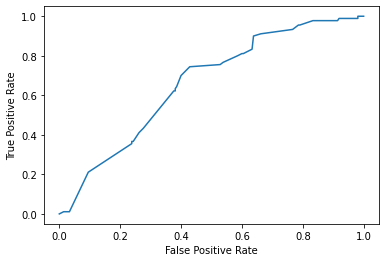

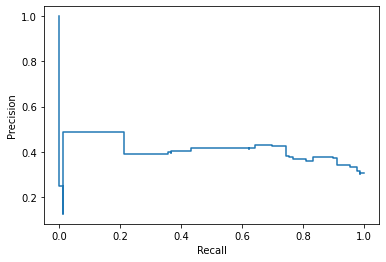

In [39]:
y_score = Model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=Model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=Model.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()